In [1]:
# Initial imports
import pandas as pd
from pathlib import Path

In [2]:
### Data Preparation

In [3]:
#Read `crypto_data.csv` into Pandas. 
file_path = Path("/Users/theluggage/Desktop/DataAnalyticsBootcampHomework/Homework 20/Resources/crypto_data.csv")
crypto_df = pd.read_csv(file_path)
crypto_df.info()
crypto_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# Discard all cryptocurrencies that are _not_ being traded. 
#In other words, filter for currencies that are currently being traded. 

crypto = crypto_df[crypto_df['IsTrading']==True]

crypto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   IsTrading        1144 non-null   bool   
 4   ProofType        1144 non-null   object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 63.7+ KB


In [5]:
# Once you have done this, drop the `IsTrading` column from the dataframe.

crypto = crypto.drop(['IsTrading'], axis=1)

crypto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   ProofType        1144 non-null   object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  1144 non-null   object 
dtypes: float64(1), object(5)
memory usage: 62.6+ KB


In [6]:
# Remove all rows that have at least one null value.

crypto = crypto.dropna()
crypto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       685 non-null    object 
 1   CoinName         685 non-null    object 
 2   Algorithm        685 non-null    object 
 3   ProofType        685 non-null    object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  685 non-null    object 
dtypes: float64(1), object(5)
memory usage: 37.5+ KB


In [7]:
# Filter for cryptocurrencies that have been mined. 
# That is, the total coins mined should be greater than zero.

crypto = crypto_df[crypto_df['TotalCoinsMined']>0]
crypto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 1248
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       577 non-null    object 
 1   CoinName         577 non-null    object 
 2   Algorithm        577 non-null    object 
 3   IsTrading        577 non-null    bool   
 4   ProofType        577 non-null    object 
 5   TotalCoinsMined  577 non-null    float64
 6   TotalCoinSupply  577 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 32.1+ KB


In [8]:
#In order for your dataset to be comprehensible to a machine learning algorithm, 
#its data should be numeric. Since the coin names do not contribute to the 
#analysis of the data, delete the `CoinName` from the original dataframe.

crypto = crypto.drop(['CoinName'], axis=1)

crypto

,Unnamed: 0,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,1337,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1242,GAP,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,True,PoW,7.296538e+06,21000000
1247,XBC,Scrypt,True,PoS,1.283270e+05,1000000


In [9]:
# Your next step in data preparation is to convert the remaining features with text values, 
# `Algorithm` and `ProofType`, into numerical data. 
# To accomplish this task, use Pandas to create dummy variables.

crypto = pd.get_dummies(crypto, prefix=['Algorithm','ProofType'],
                                 columns=['Algorithm','ProofType'])

crypto = crypto.drop(['IsTrading'], axis=1)

crypto

,Unnamed: 0,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,42,4.199995e+01,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,404,1.055185e+09,532000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,ETH,1.076842e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247,XBC,1.283270e+05,1000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Reindex the dataframe.
crypto = crypto.set_index('Unnamed: 0')
crypto

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Examine the number of rows and columns of your dataset now. How did they change?

#The dataset changed from 6 columns and 1252 rows to 101 columns and 577 rows. The Alglorithms
#and Proof Types are now expressed in columns and numeric values, which are easier to 
#process. 

In [12]:
### Dimensionality Reduction

In [15]:
# Perform dimensionality reduction with PCA.  
# For this project, preserve 90% of the explained variance in dimensionality reduction. 

#Scale the model.
from sklearn.preprocessing import StandardScaler
crypto_scaled = StandardScaler().fit_transform(crypto)

# Initialize PCA model
from sklearn.decomposition import PCA
pca = PCA(n_components=.9)

# Get two principal components for the crypto data.
crypto_pca = pca.fit_transform(crypto_scaled)

crypto_pca

array([[-3.25873467e-01,  1.13989379e+00, -5.58793131e-01, ...,
        -4.60257758e-15,  2.17180165e-15,  2.04939783e-15],
       [-3.08532273e-01,  1.14012328e+00, -5.59207977e-01, ...,
        -5.38398257e-15,  1.89495381e-15,  2.20842641e-15],
       [ 2.42049045e+00,  1.71779871e+00, -6.35945634e-01, ...,
         7.86335322e-14, -4.48023466e-14,  1.17877844e-15],
       ...,
       [-1.50690337e-01, -2.07676698e+00,  3.80761010e-01, ...,
        -4.73535827e-16, -8.18098464e-16, -1.03118784e-15],
       [-2.79988707e-01,  7.92128764e-01, -2.56735735e-01, ...,
        -4.12375233e-16,  2.62629084e-15,  3.31383644e-16],
       [-3.24864062e-01,  1.13985756e+00, -5.58810407e-01, ...,
        -4.40222413e-15,  2.66327193e-15,  2.23688565e-15]])

In [34]:

#Change the PCA data into a dataframe.

crypto_pca_df = pd.DataFrame(data=crypto_pca,
                             columns=['pca_component %i' % i for i in range(len(crypto_pca[0]))])
crypto_pca_df

,pca_component 0,pca_component 1,pca_component 2,pca_component 3,pca_component 4,pca_component 5,pca_component 6,pca_component 7,pca_component 8,pca_component 9,...,pca_component 67,pca_component 68,pca_component 69,pca_component 70,pca_component 71,pca_component 72,pca_component 73,pca_component 74,pca_component 75,pca_component 76
0,-0.325873,1.139894,-0.558793,0.001330,-1.616714e-14,-5.532511e-14,1.301557e-14,-0.013586,-1.228595,-0.061216,...,-3.960947e-15,5.830037e-15,2.009793e-15,-3.883203e-15,-3.373017e-15,2.335603e-15,4.882390e-16,-4.602578e-15,2.171802e-15,2.049398e-15
1,-0.308532,1.140123,-0.559208,0.001318,-1.577818e-14,-5.720980e-14,1.284439e-14,-0.014233,-1.231987,-0.064990,...,-3.979283e-15,5.833578e-15,1.492042e-15,-3.708591e-15,-3.576340e-15,2.493492e-15,4.683608e-17,-5.383983e-15,1.894954e-15,2.208426e-15
2,2.420490,1.717799,-0.635946,0.004728,-1.554287e-14,-8.134827e-14,3.113329e-14,-0.064570,-1.575150,-0.732407,...,5.724043e-14,-2.442253e-14,1.804546e-14,1.049580e-13,7.148985e-14,-1.506238e-14,-2.332155e-15,7.863353e-14,-4.480235e-14,1.178778e-15
3,-0.138908,-1.349133,0.166846,-0.001204,4.204970e-15,1.735607e-14,-6.299960e-15,0.001798,0.181201,0.226610,...,1.114161e-14,-7.316393e-15,-8.048372e-15,1.283250e-14,1.535815e-15,-3.258294e-16,1.037762e-14,1.547710e-14,-7.450692e-15,3.983562e-15
4,-0.135897,-2.110498,0.357371,-0.001688,7.704633e-15,3.694911e-14,-1.807783e-14,0.033395,0.359324,0.193160,...,9.502085e-14,-3.165575e-14,3.868677e-14,2.315733e-14,-1.237664e-13,-7.405775e-14,1.114262e-13,-3.281731e-14,1.138262e-13,1.233382e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,-0.323844,1.139786,-0.558823,0.001332,-1.592661e-14,-5.704917e-14,1.293376e-14,-0.013613,-1.229063,-0.061712,...,-3.670804e-15,5.787931e-15,1.818585e-15,-4.001130e-15,-2.932456e-15,2.963226e-15,2.243654e-16,-4.649886e-15,2.515795e-15,2.122570e-15
573,0.323033,-2.354008,0.374493,-0.001278,8.990265e-15,3.569679e-14,-1.265388e-14,0.022914,-0.030530,0.042516,...,4.739329e-14,1.812351e-14,-4.689460e-14,-3.763249e-15,-1.923215e-14,-4.610122e-15,5.055850e-14,-4.990451e-15,3.768901e-14,1.209048e-14
574,-0.150690,-2.076767,0.380761,-0.001709,9.732179e-15,4.125053e-14,-1.518325e-14,0.035645,0.476849,0.258569,...,-1.430154e-15,-7.998250e-16,-9.014970e-16,-5.995925e-17,1.555378e-15,-2.590381e-15,-4.696157e-17,-4.735358e-16,-8.180985e-16,-1.031188e-15
575,-0.279989,0.792129,-0.256736,0.000479,-5.877944e-15,-2.480130e-14,7.946894e-15,-0.024881,0.962765,-0.736184,...,1.088572e-15,1.580701e-15,-9.887375e-16,1.050932e-15,6.525770e-15,1.554387e-15,-1.008370e-15,-4.123752e-16,2.626291e-15,3.313836e-16


In [ ]:
# How did the number of the features change?

# The number of features changed from 101 to 77.

In [22]:
# Next, further reduce the dataset dimensions with t-SNE and visually inspect the results. 
# In order to accomplish this task, run t-SNE on the principal components: 
# the output of the PCA transformation. 

from sklearn.manifold import TSNE

# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

# Reduce dimensions
tsne_features = tsne.fit_transform(crypto_pca)

tsne_features.shape

(577, 2)

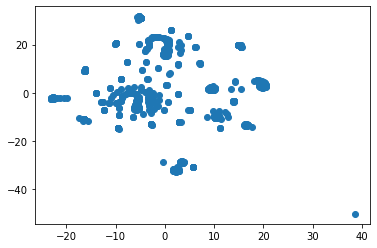

In [35]:
# Then create a scatter plot of the t-SNE output. 

import matplotlib.pyplot as plt

# The first column of transformed features
crypto_pca_df['x'] = tsne_features[:,0]

# The second column of transformed features
crypto_pca_df['y'] = tsne_features[:,1]

# Visualize the clusters
plt.scatter(crypto_pca_df['x'], crypto_pca_df['y'])
plt.show()

In [ ]:
# Observe whether there are distinct clusters or not.

#It looks like there is one major cluster with 2-3 clusters surrounding it,
#and what appears to be an outlier at the bottom right quadrant.

In [ ]:
### Cluster Analysis with k-Means

In [27]:
# Create an elbow plot to identify the best number of clusters. Use a for-loop to determine 
# the inertia for each `k` between 1 through 10. Determine, if possible, where the elbow of 
# the plot is, and at which value of `k` it appears.

from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

In [28]:
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,52647.245210
1,2,51490.471495
2,3,50703.562584
3,4,48971.788513
4,5,48014.849993


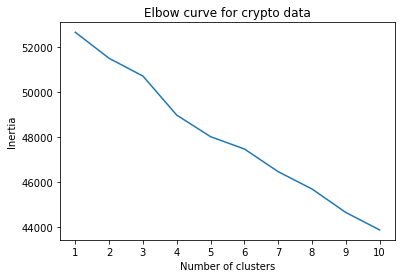

In [29]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for crypto data')
plt.show()

In [ ]:
### Recommendations:

In [ ]:
# Based on your findings, make a brief (1-2 sentences) recommendation to your clients. 
# Can the cryptocurrencies be clustered together? If so, into how many clusters? 

# It looks like the crypto currencies can be clustered into 5 optimal clusters for 
# classification purposes with only a few outliers, which can be discounted.